#anchor box 만들기!

원본 이미지에 anchor 정하기

In [18]:
import numpy as np
import cv2

In [79]:
#원본 이미지 한 변의 사이즈 예시
iamge_size=1024
#축소비율 예시
sub_sampling_ratio=32
#피쳐맵 한 변의 사이즈
feature_map_size=feature_map//sub_sampling_ratio
#피쳐맵에서 anchor_x,anchor_y 만들기
anchor_x = np.arange(sub_sampling_ratio/2,feature_map+1,sub_sampling_ratio/2)
print(anchor_x)
anchor_y = np.arange(sub_sampling_ratio/2,feature_map+1,sub_sampling_ratio/2)
print(anchor_y)
xx, yy = np.meshgrid(anchor_x, anchor_y)
print(xx,yy,sep='\n')
#anchor_x,anchor_y 좌표개념의 만들기
anchor=np.column_stack((xx.ravel(), yy.ravel()))
print(anchor)

[  16.   32.   48.   64.   80.   96.  112.  128.  144.  160.  176.  192.
  208.  224.  240.  256.  272.  288.  304.  320.  336.  352.  368.  384.
  400.  416.  432.  448.  464.  480.  496.  512.  528.  544.  560.  576.
  592.  608.  624.  640.  656.  672.  688.  704.  720.  736.  752.  768.
  784.  800.  816.  832.  848.  864.  880.  896.  912.  928.  944.  960.
  976.  992. 1008. 1024.]
[  16.   32.   48.   64.   80.   96.  112.  128.  144.  160.  176.  192.
  208.  224.  240.  256.  272.  288.  304.  320.  336.  352.  368.  384.
  400.  416.  432.  448.  464.  480.  496.  512.  528.  544.  560.  576.
  592.  608.  624.  640.  656.  672.  688.  704.  720.  736.  752.  768.
  784.  800.  816.  832.  848.  864.  880.  896.  912.  928.  944.  960.
  976.  992. 1008. 1024.]
[[  16.   32.   48. ...  992. 1008. 1024.]
 [  16.   32.   48. ...  992. 1008. 1024.]
 [  16.   32.   48. ...  992. 1008. 1024.]
 ...
 [  16.   32.   48. ...  992. 1008. 1024.]
 [  16.   32.   48. ...  992. 1008. 1024.

이해를 돕기위해 이미지를 만들고 표현하기

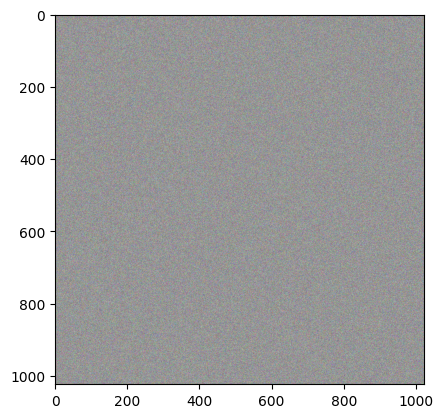

In [40]:
#임시로 이미지 만들기
import numpy as np
import matplotlib.pyplot as plt

ex_image_size = (iamge_size,iamge_size)

# 랜덤 이미지 생성하기
random_image = np.random.randint(100, 200, size=(image_size[0], image_size[1], 3), dtype=np.uint8)

# 생성된 이미지 출력하기
plt.imshow(random_image)
plt.show()


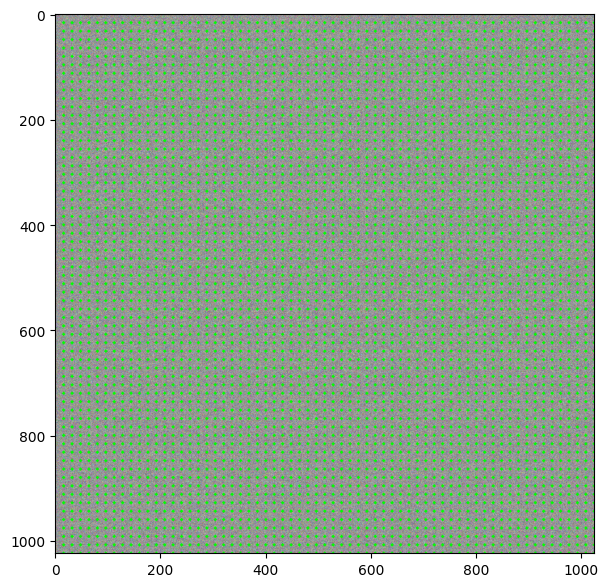

In [26]:
#원본 이미지에 anchor를 만들고 거기에서 anchor_box를 만들었다.

anchor = anchor.astype("int32")

plt.figure(figsize=(7, 7))
for i in range(anchor.shape[0]):
    cv2.circle(random_image, (anchor[i][0], anchor[i][1]),
              radius=1, color=(0, 255, 0), thickness=3)
plt.imshow(random_image)
plt.show()

anchor box w,h 정하기

In [5]:
scale = [128,256,512]
ratio=[0.5,1,2]
w=[]
h=[]
for i in scale:
  for j in ratio:
    w1 = np.sqrt(i**2 / j)
    w.append(w1)
    h1 = np.sqrt(j * i**2)
    h.append(h1)

anchor box (y1,x1,y2,x2)만들기

In [82]:
anchor_box_num=[]
wh=zip(w,h)
for n,i in enumerate(wh):
  anchor_box_num.insert(n,[-i[0]/2,-i[1]/2,i[0]/2,i[1]/2])
anchor_boxes_9=np.array(anchor_box_num)

In [81]:
# y1,x1,y2,x2
anchor_boxes_9

array([[ -90.50966799,  -45.254834  ,   90.50966799,   45.254834  ],
       [ -64.        ,  -64.        ,   64.        ,   64.        ],
       [ -45.254834  ,  -90.50966799,   45.254834  ,   90.50966799],
       [-181.01933598,  -90.50966799,  181.01933598,   90.50966799],
       [-128.        , -128.        ,  128.        ,  128.        ],
       [ -90.50966799, -181.01933598,   90.50966799,  181.01933598],
       [-362.03867197, -181.01933598,  362.03867197,  181.01933598],
       [-256.        , -256.        ,  256.        ,  256.        ],
       [-181.01933598, -362.03867197,  181.01933598,  362.03867197]])

각 anchor당 anchor_boxes를 배정

In [84]:
#총 anchor_box 구하기
len(anchor) * len(anchor_boxes_9)
print('anchor')
print(type(anchor))
print('anchor_boxes_9')
print(type(anchor_boxes_9))
#총 구한 anchor_box를 전체 배열로 나타내기
#각각의 anchor에다가 anchor_box를 만들었다.
all_anchor_boxes = np.zeros((36864, 4))
for i in range(len(anchor)):
  for j in anchor_boxes_9:
    all_anchor_boxes[i,0]=anchor[i,0]+j[0]
    all_anchor_boxes[i,1]=anchor[i,1]+j[1]
    all_anchor_boxes[i,2]=anchor[i,0]+j[2]
    all_anchor_boxes[i,3]=anchor[i,1]+j[3]
all_anchor_boxes

anchor
<class 'numpy.ndarray'>
anchor_boxes_9
<class 'numpy.ndarray'>


array([[-165.01933598, -346.03867197,  197.01933598,  378.03867197],
       [-149.01933598, -346.03867197,  213.01933598,  378.03867197],
       [-133.01933598, -346.03867197,  229.01933598,  378.03867197],
       ...,
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

범위에서 벗어나는 anchor_boxes 삭제

범위 안에 있는 anchor_boxes 남겨두기

In [85]:
image_size = (1024, 1024)

# 이미지 경계를 벗어나지 않는 anchor boxes 남겨두기 위해 조건에 맞는 인덱스값구하기
valid_indices = np.where(
    (all_anchor_boxes[:, 0] >= 0) &
    (all_anchor_boxes[:, 1] >= 0) &
    (all_anchor_boxes[:, 2] <= image_size[0]) &
    (all_anchor_boxes[:, 3] <= image_size[1])
)
# 구한 인덱스로 anchor_boxes제대로 구하기
anchor_boxes = all_anchor_boxes[valid_indices]

만들었던 anchor_boxes를 random_image에 표현하기

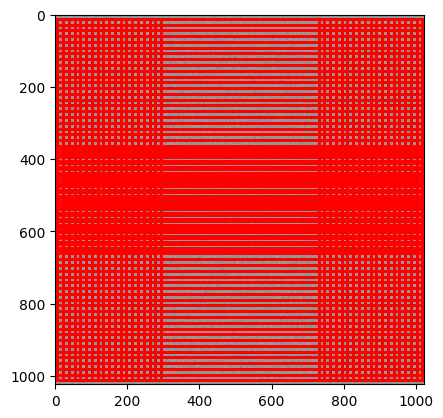

In [61]:
import matplotlib.patches as patches
# 이미지 읽기
image = cv2.imread('path_to_your_image.jpg')
random_image1 = np.random.randint(100, 200, size=(1024,1024, 3), dtype=np.uint8)
# 이미지에 박스 그리기
fig, ax = plt.subplots(1)
ax.imshow(random_image1)

for i,box in enumerate(anchor_boxes):
    y1, x1, y2, x2 = box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
#    if i == 5000:
 #     break
plt.show()

앵커박스 만들기 완료

GT_BOX랑 비교해서 IOU계산하자!!

In [62]:
#기본적인 IOU계산은 면적으로한다.
#IOU=겹치는 부분/GT_area+anchor_area-겹치는 부분
#input = GT[y1,x1,y2,x2],anchor[y1,x1,y2,x2]
#anchor box와 GT_box를 계산한다.

#임의의 GT_boxes
GT_boxes=[[10.98066402,   5.96132803, 373.01933598, 730.03867197]]

IOUs=[]
for anchor_box in anchor_boxes:
  anchor_area=(anchor_box[3]-anchor_box[1])*(anchor_box[2]-anchor_box[0])
  for GT_box in GT_boxes:
    GT_area=(GT_box[3]-GT_box[1])*(GT_box[2]-GT_box[0])
     #겹치는 부분이 있는지 확인하고 있다면 겹치는 부분 계산
    intersection_y1 = max(GT_box[0],anchor_box[0])
    intersection_x1 = max(GT_box[1], anchor_box[1])
    intersection_y2 = min(GT_box[2], anchor_box[2])
    intersection_x2 = min(GT_box[3], anchor_box[3])

    if (intersection_x2-intersection_x1>0) and (intersection_y2-intersection_y1>0):
      inter_area = (intersection_x2 - intersection_x1) * (intersection_y2 - intersection_y1)
      iou=inter_area/(GT_area+anchor_area-inter_area)
    else:
      iou=0
    IOUs.append(iou)



In [ ]:
IOUs

Positive =1, negative =0인 IOUs의 라벨을 만든다

In [78]:
#IOUs인덱스에 맞춰 label작업을 해야한다.
label = np.zeros(len(anchor_boxes))
max_idx = np.argmax(IOUs)

In [ ]:
positive_idx = np.where((IOUs[max_idx] >= 0.7) | (IOUs >= 0.7),IOUs)
negative_idx = np.where(IOUs < 0.3)
label[positive_idx] = 1
label[negative_idx] = 0

### RPN

In [ ]:
import torch.nn as nn
import torch.functional as F

class RPN(nn.Module):
    #anchor_count = 한 픽셀당 앵커 개수
    #anchor_stride = 1
    #input_channel = 인풋의 채널
    def __init__(self, anchor_count, anchor_stride, input_channel):
        super(RPN, self).__init__()
        self.anchor_count = anchor_count
        self.anchor_stride = anchor_stride
        self.input_channel = input_channel
        self.conv1 = nn.Conv2d(self.input_channel, 512, kernel_size=3, stride=self.anchor_stride, padding=1) # Added padding
        self.ReLU=nn.ReLU(inplace=True)
        self.conv_class = nn.Conv2d(512, 2 * self.anchor_count, kernel_size=1)
        self.conv_softmax = nn.Softmax2d()
        self.conv_bbox = nn.Conv2d(512, 4 * self.anchor_count, kernel_size=1)

    def forward(self, x):
        x = self.ReLU(self.conv1(x))
        rpn_class = self.conv_class(x)
        rpn_probs = self.conv_softmax(rpn_class)
        rpn_bbox = self.conv_bbox(x)

        return rpn_class, rpn_probs, rpn_bbox